In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
Data = pd.read_csv('C:/Users/kobalaji/Desktop/LetsUpgrade AI-ML/Multiple Linear Regression/kc_house_data.csv')

In [316]:
Data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [317]:
Data['condition']= Data['condition'].astype('int')

In [318]:
Data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [319]:
cols = ['id', 'date']

In [320]:
Data.drop(cols ,axis = "columns", inplace=True)

In [321]:
Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [324]:
Data = Data[['bedrooms','floors','sqft_living','condition','yr_built','price']]

In [325]:
Data

,bedrooms,floors,sqft_living,condition,yr_built,price
0,3,1.0,1180,3,1955,221900
1,3,2.0,2570,3,1951,538000
2,2,1.0,770,3,1933,180000
3,4,1.0,1960,5,1965,604000
4,3,1.0,1680,3,1987,510000
...,...,...,...,...,...,...
21592,3,3.0,1530,3,2009,360000
21593,4,2.0,2310,3,2014,400000
21594,2,2.0,1020,3,2009,402101
21595,3,2.0,1600,3,2004,400000


In [326]:
Data.corr()

,bedrooms,floors,sqft_living,condition,yr_built,price
bedrooms,1.000000,0.177944,0.578212,0.026496,0.155670,0.308787
floors,0.177944,1.000000,0.353953,-0.264075,0.489193,0.256804
sqft_living,0.578212,0.353953,1.000000,-0.059445,0.318152,0.701917
condition,0.026496,-0.264075,-0.059445,1.000000,-0.361592,0.036056
yr_built,0.155670,0.489193,0.318152,-0.361592,1.000000,0.053953
price,0.308787,0.256804,0.701917,0.036056,0.053953,1.000000


In [327]:
Data['floors'] = Data['floors'].astype('int')

In [328]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
bedrooms       21597 non-null int64
floors         21597 non-null int32
sqft_living    21597 non-null int64
condition      21597 non-null int32
yr_built       21597 non-null int64
price          21597 non-null int64
dtypes: int32(2), int64(4)
memory usage: 843.7 KB


In [329]:
Data['floors']

0        1
1        2
2        1
3        1
4        1
        ..
21592    3
21593    2
21594    2
21595    2
21596    2
Name: floors, Length: 21597, dtype: int32

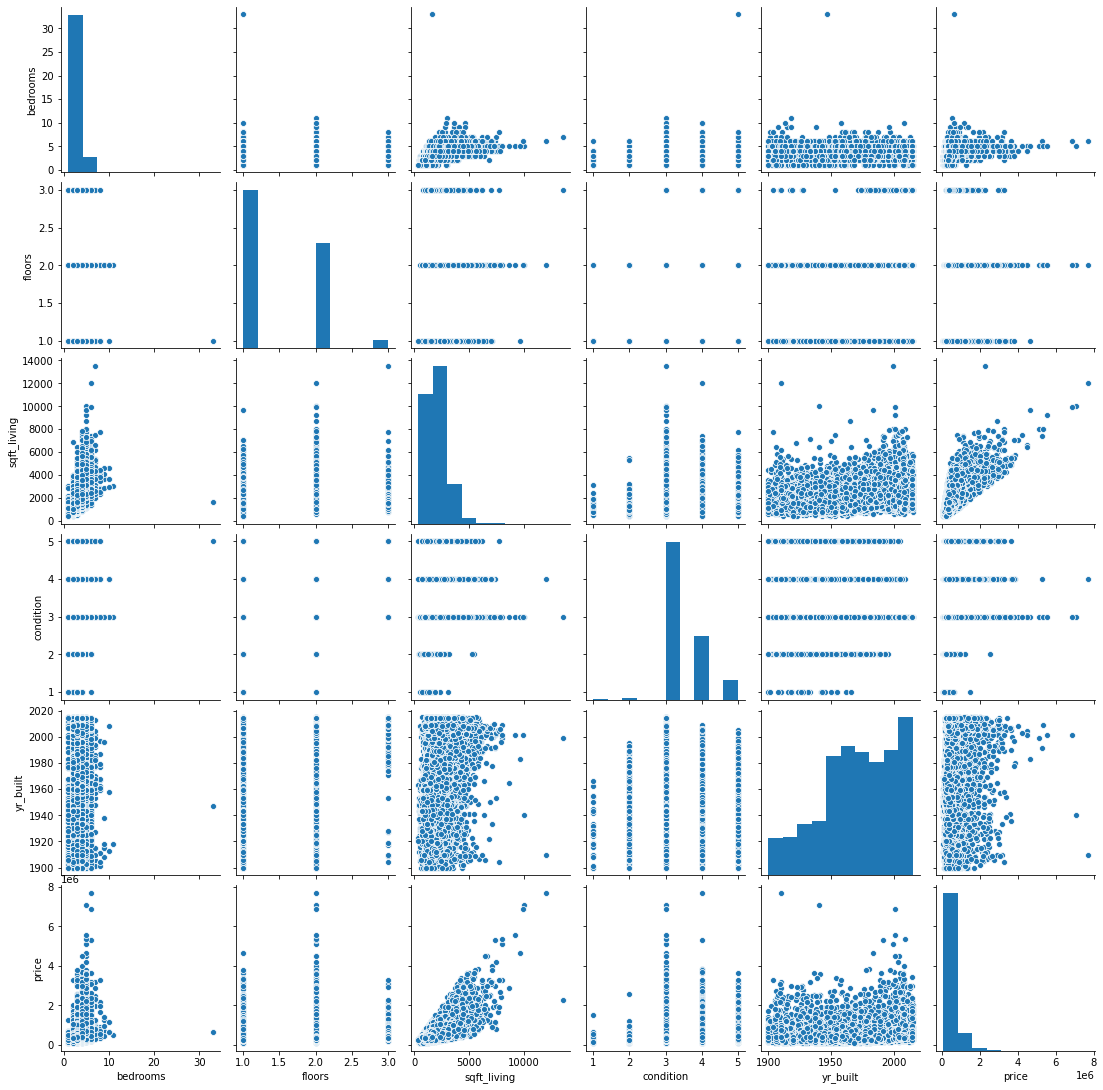

In [330]:
sns.pairplot(Data)

<AxesSubplot:>

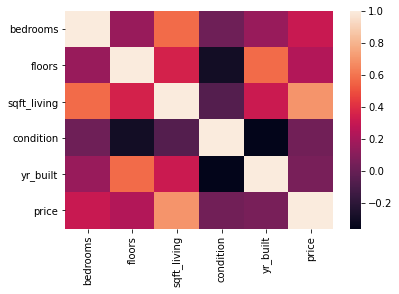

In [333]:
sns.heatmap(Data.corr())

In [334]:
x = Data.iloc[:,:-1]

In [335]:
x

,bedrooms,floors,sqft_living,condition,yr_built
0,3,1,1180,3,1955
1,3,2,2570,3,1951
2,2,1,770,3,1933
3,4,1,1960,5,1965
4,3,1,1680,3,1987
...,...,...,...,...,...
21592,3,3,1530,3,2009
21593,4,2,2310,3,2014
21594,2,2,1020,3,2009
21595,3,2,1600,3,2004


In [336]:
y =  Data.iloc[:,-1:]

In [337]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21592,360000
21593,400000
21594,402101
21595,400000


<AxesSubplot:>

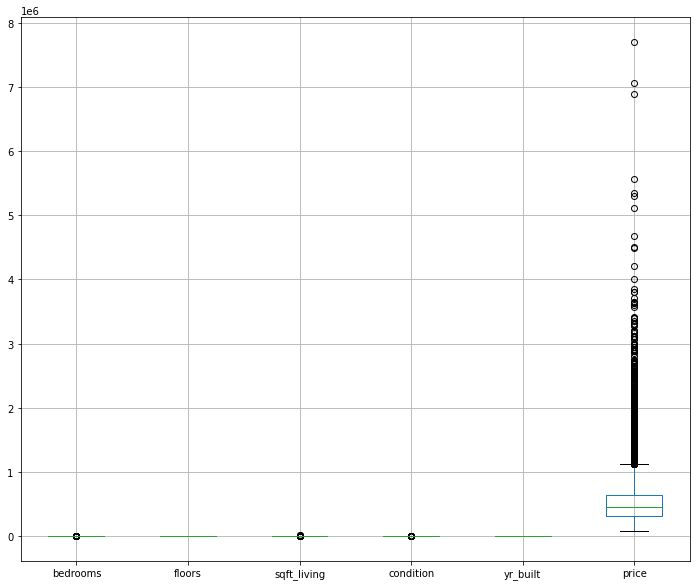

In [338]:
Data.boxplot(figsize=(12,10))

<AxesSubplot:xlabel='price'>

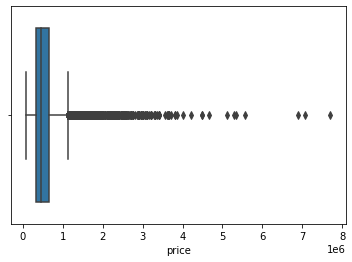

In [339]:
sns.boxplot(Data['price'])

In [340]:
Data.describe()

,bedrooms,floors,sqft_living,condition,yr_built,price
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,1.445988,2080.321850,3.409825,1970.999676,5.402966e+05
std,0.926299,0.551658,918.106125,0.650546,29.375234,3.673681e+05
min,1.000000,1.000000,370.000000,1.000000,1900.000000,7.800000e+04
25%,3.000000,1.000000,1430.000000,3.000000,1951.000000,3.220000e+05
50%,3.000000,1.000000,1910.000000,3.000000,1975.000000,4.500000e+05
75%,4.000000,2.000000,2550.000000,4.000000,1997.000000,6.450000e+05
max,33.000000,3.000000,13540.000000,5.000000,2015.000000,7.700000e+06


In [341]:
#from sklearn.preprocessing import normalize
#nr = normalize(Data)
Data.shape

(21597, 6)

In [342]:
print(nr.shape)
Data2 = pd.DataFrame(nr,columns=['bedrooms','bathrooms','sqft_living','price'])

(21597, 4)


In [343]:
Data2.head()

,bedrooms,bathrooms,sqft_living,price
0,0.000014,0.000005,0.005318,0.999986
1,0.000006,0.000004,0.004777,0.999989
2,0.000011,0.000006,0.004278,0.999991
3,0.000007,0.000005,0.003245,0.999995
4,0.000006,0.000004,0.003294,0.999995


In [344]:
x.head(10)

,bedrooms,floors,sqft_living,condition,yr_built
0,3,1,1180,3,1955
1,3,2,2570,3,1951
2,2,1,770,3,1933
3,4,1,1960,5,1965
4,3,1,1680,3,1987
5,4,1,5420,3,2001
6,3,2,1715,3,1995
7,3,1,1060,3,1963
8,3,1,1780,3,1960
9,3,2,1890,3,2003


In [345]:
y.head(10)

,price
0,221900
1,538000
2,180000
3,604000
4,510000
5,1230000
6,257500
7,291850
8,229500
9,323000


In [346]:
from sklearn.model_selection import train_test_split

In [353]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size  = 0.25,random_state =2)

In [354]:
x_train.shape

(16197, 5)

In [355]:
x_train.head(1)

,bedrooms,floors,sqft_living,condition,yr_built
5197,3,1,2080,4,1981


In [356]:
y_train.shape

(16197, 1)

In [357]:
x_test.shape

(5400, 5)

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
lm = LinearRegression()


In [360]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [361]:
lm.coef_

array([[-55855.92610033,  78421.48983164,    323.09315359,
         20986.59845137,  -2938.07560613]])

In [362]:
lm.intercept_

array([5661967.3830282])

In [363]:
YPred = lm.predict(x_test)

In [364]:
YPred

array([[364641.48563229],
       [575956.17675008],
       [459547.42394614],
       ...,
       [460983.7198505 ],
       [271973.0996412 ],
       [895793.73611285]])

In [366]:
lm.predict(np.array([[6,1,2630,3,1959]]))

array([[562257.99314403]])

In [367]:
Data.iloc[1984]

bedrooms            6
floors              1
sqft_living      2630
condition           3
yr_built         1959
price          430000
Name: 1984, dtype: int64

In [368]:
from sklearn.metrics import r2_score,mean_squared_error

In [369]:
RMSE = np.sqrt(mean_squared_error(y_test,YPred))
MSE = mean_squared_error(y_test,YPred)
R_square = r2_score(y_test,YPred)

In [370]:
print('RMSE : ',RMSE, '\nMSE :',MSE, '\nR_square :',R_square)

RMSE :  250599.05036645677 
MSE : 62799884044.56993 
R_square : 0.5689869496683246
